In [1]:
#hanadling missing data
import seaborn as sns 

In [2]:
df = sns.load_dataset("titanic")

In [5]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#cheack missing value
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#delete the rows or data in missing values 
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

## imputation missing values
mean value impulation

<AxesSubplot: xlabel='age', ylabel='Count'>

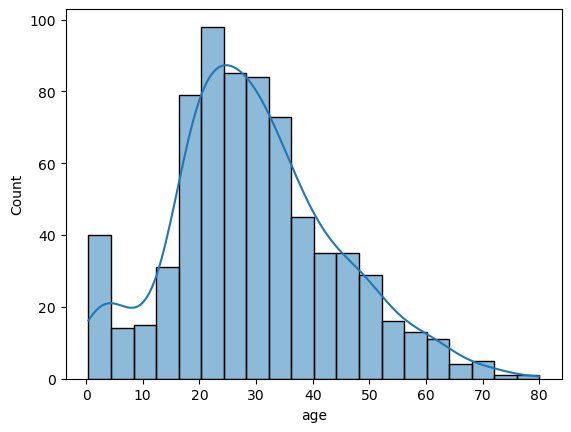

In [9]:
sns.histplot(df['age'],kde=True)

In [10]:
df['mean_age']=df['age'].fillna(df['age'].mean())

In [11]:
df[['mean_age','age']]

,mean_age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [12]:
#it is used when normally distributed data 

In [13]:
#2 median value imputation

In [14]:
df['median_age']=df['age'].fillna(df['age'].median())

In [16]:
df[['median_age','age']]

,median_age,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [17]:
## mode imputation technique - categorial data

In [18]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_age,median_age
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [19]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [46]:
df['mode_embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [47]:
df[df['mode_embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_age,median_age,mode_embarked


In [48]:
df[df[['embarked','mode_embarked']]['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_age,median_age,mode_embarked
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S


In [2]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [4]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [7]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]


In [8]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [9]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [10]:
df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [12]:
df_majority

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [13]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [14]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [15]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [16]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]


In [17]:
from sklearn.utils import resample
df_majority_upsampled=resample(df_majority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [18]:
df_downsampled=pd.concat([df_minority,df_majority_upsampled])

In [19]:
df_downsampled

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
398,-0.168426,0.553775,0
76,-0.403366,0.081491,0
196,-0.269293,0.611238,0
631,-0.295829,0.671673,0


In [1]:
from sklearn.datasets import make_classification

In [4]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

In [5]:
import pandas as pd

In [10]:
df1 =pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)

In [11]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [13]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [14]:
import matplotlib.pyplot as plt

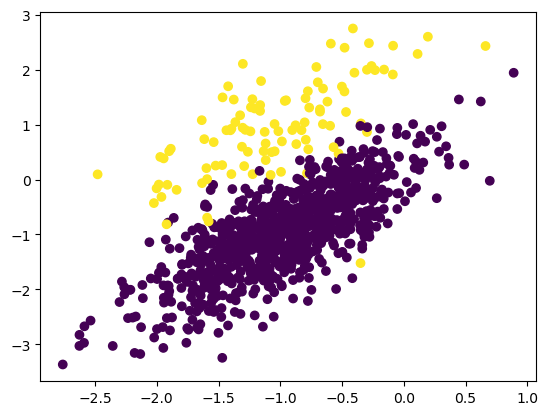

In [15]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [16]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [20]:
X.shape,y.shape

((1800, 2), (1800,))

In [21]:
df3 =pd.DataFrame(X,columns=['f1','f2'])
df4 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df3,df4],axis=1)

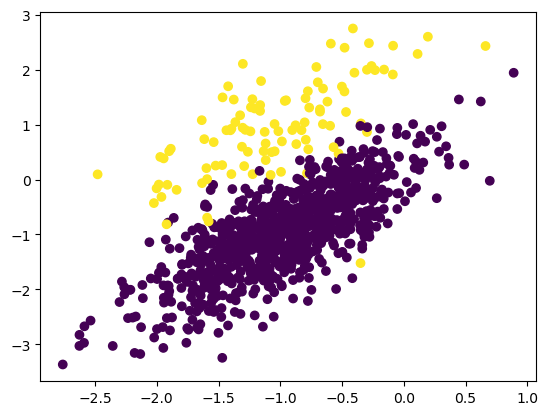

In [23]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

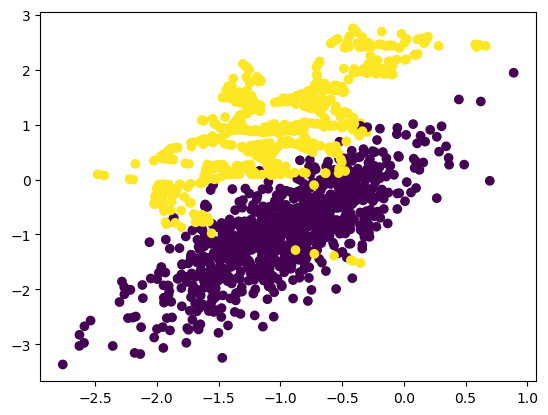

In [22]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

In [37]:
#linear interpolation

In [26]:
import numpy as np

In [27]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])


In [28]:
import matplotlib.pyplot as plt


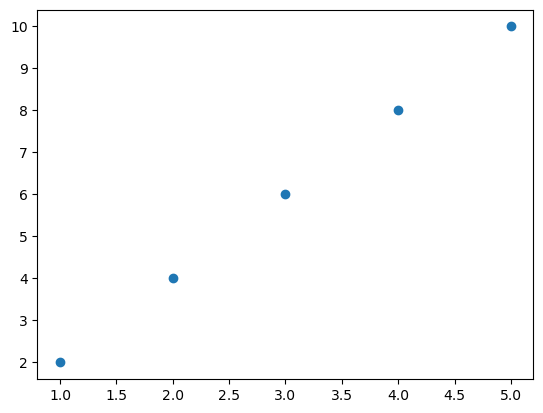

In [29]:
plt.scatter(x,y)

In [31]:
x_new=np.linspace(1,5,10)
y_interp=np.interp(x_new,x,y)

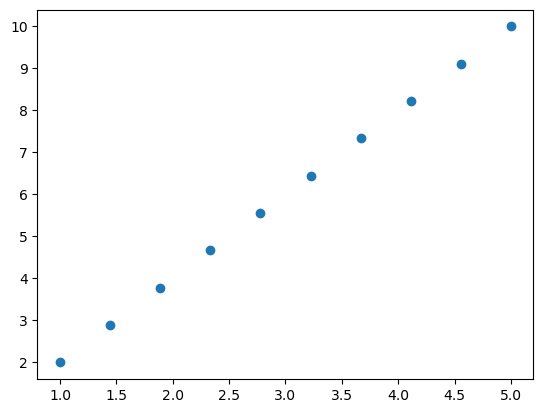

In [32]:
plt.scatter(x_new,y_interp)

In [34]:
#cubic interpolation

In [35]:
x

array([1, 2, 3, 4, 5])

In [36]:
y1 =np.array([1,8,27,64,125])

In [37]:
from scipy.interpolate import interp1d

In [38]:
f=interp1d(x,y1,kind='cubic')

In [39]:
x_new

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

In [40]:
y1_interp = f(x_new)

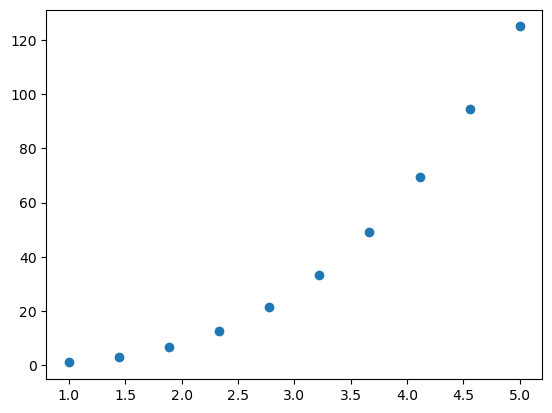

In [41]:
plt.scatter(x_new,y1_interp)

In [ ]:
#polynomial interpolation

In [42]:
y2 = np.array([1,4,9,16,25])


In [43]:
p=np.polyfit(x,y2,2)

In [44]:
y2_interp=np.polyval(p,x_new)

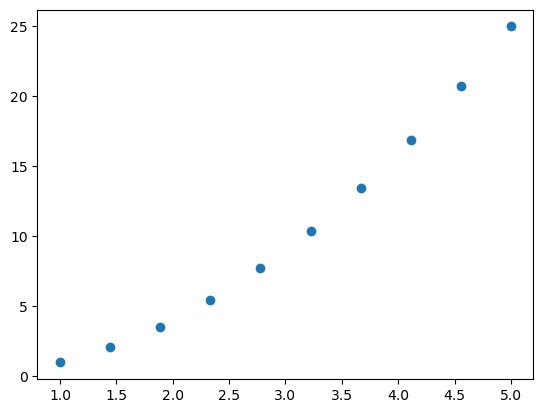

In [45]:
plt.scatter(x_new,y2_interp)

In [46]:
#5 number summary and box polt

In [47]:
import numpy as np

In [51]:
lst_marks=[44,56,44,67,88,95,44,33,77,88,66,44,33,66,54,35,53,65]

In [52]:
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.5,0.75,1.0])

In [53]:
minimum,Q1,median,Q3,maximum

(33.0, 44.0, 55.0, 66.75, 95.0)

In [54]:
IQR=Q3-Q1
print(IQR)

22.75


In [68]:
lower_fence=Q1-1.5*IQR
higher_fence=Q3+1.5*IQR

In [56]:
import seaborn as sns

<AxesSubplot: >

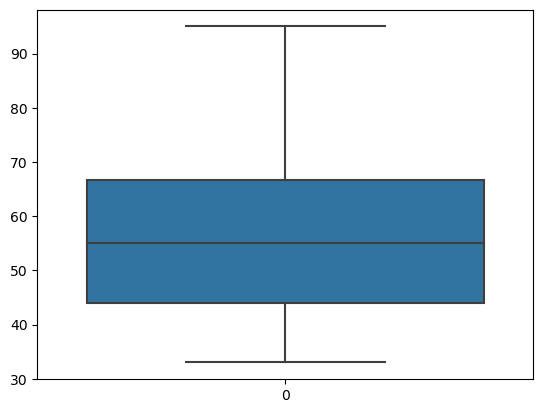

In [59]:
sns.boxplot(lst_marks)

In [64]:
lst_marks=[-10,44,56,44,67,88,95,44,33,77,88,66,44,33,66,54,35,53,65,120,130]

<AxesSubplot: >

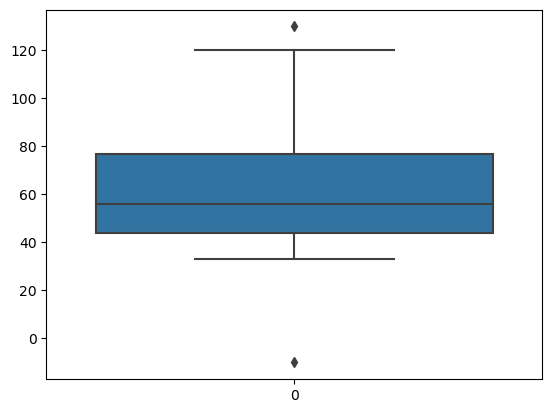

In [65]:
sns.boxplot(lst_marks)

In [66]:
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.5,0.75,1.0])

In [ ]:
#standardziation

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
import numpy as np

In [5]:
mean=np.mean(df["total_bill"])
std=np.std(df["total_bill"])


In [6]:
normalized_data=[]
for i in list(df["total_bill"]):
    z_score = (i-mean)/std
    normalized_data.append(z_score)
    

In [7]:
normalized_data

[-0.31471130509049433,
 -1.0632353132988694,
 0.13777989987156147,
 0.4383151031672548,
 0.5407447042905061,
 0.6195367051545456,
 -1.2399545152367868,
 0.7985071071171497,
 -0.5342033074974615,
 -0.5634689078183904,
 -1.0711145133852735,
 1.7417599174609368,
 -0.49143050702841135,
 -0.1526249033130415,
 -0.5578409077566732,
 0.20193910057513614,
 -1.0643609133112129,
 -0.39350330595453376,
 -0.31696250511518115,
 0.09725829942719796,
 -0.21003050394255576,
 0.05673669898283485,
 -0.4520345065963916,
 2.2100095225958007,
 0.0038334984026941687,
 -0.22241210407833373,
 -0.7221785095588128,
 -0.7987193103981655,
 0.2154463007232573,
 -0.01530170180714419,
 -1.1521577142739996,
 -0.16162970341178867,
 -0.5319521074727744,
 0.10176069947657196,
 -0.22578890411536373,
 0.4810879036363047,
 -0.39125210592984694,
 -0.3214649051645547,
 -0.12335930299211235,
 1.2926455125359118,
 -0.4216433062631193,
 -0.26180810451035325,
 -0.6580193088552377,
 -1.1375249141135353,
 1.1947183114620339,
 -0.16

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

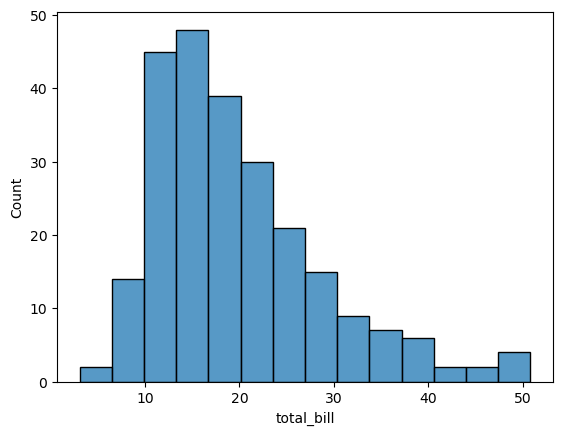

In [8]:
sns.histplot(df['total_bill'])

<AxesSubplot: ylabel='Count'>

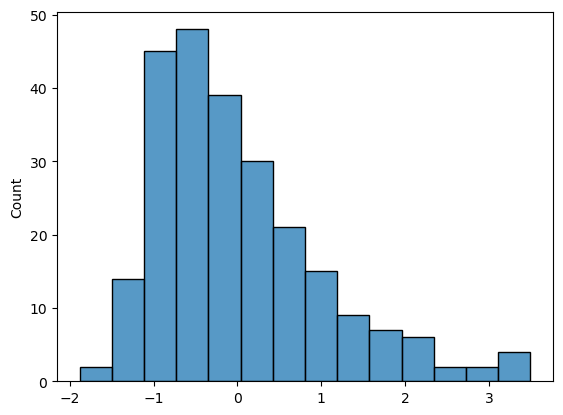

In [9]:
sns.histplot(normalized_data)

In [10]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler

StandardScaler()

In [16]:
scaler.fit(df[["total_bill"]])

StandardScaler()

In [19]:
a=scaler.transform(df[["total_bill"]])

In [23]:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[["total_bill","tip"]]),columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [24]:
scaler.transform([[13,4]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

In [25]:
#normalization min max scaler


In [28]:
df = sns.load_dataset('taxis')

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
min_max=MinMaxScaler()

In [32]:
pd.DataFrame(min_max.fit_transform(df[['distance','fare','tip']]),columns=['distance','fare','tip'])

,distance,fare,tip
0,0.043597,0.040268,0.064759
1,0.021526,0.026846,0.000000
2,0.037330,0.043624,0.071084
3,0.209809,0.174497,0.185241
4,0.058856,0.053691,0.033133
...,...,...,...
6428,0.020436,0.023490,0.031928
6429,0.510627,0.382550,0.000000
6430,0.112807,0.100671,0.000000
6431,0.030518,0.033557,0.000000


In [33]:
#unit vector feature scalling


In [36]:
from sklearn.preprocessing import normalize
pd.DataFrame(normalize(df[['distance','fare','tip']]))

,0,1,2
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000
